In [ ]:
pip install folium

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import folium 

In [2]:
idp = pd.read_excel("IDP .xlsx")

In [3]:
idp

,1.1.a.1: Survey Date,1.1.c.1: Site ID,1.1.d.1: Site Name,1.4.a.2: Is site open?,1.1.e.2: Zone,Zone Code,1.1.e.3: Woreda,1.1.e.4: Kebele,1.1.f.1: GPS: Longitude,1.1.f.2: GPS: Latitude,...,S1723: Other internet sources (e.g. apps),S1723: Please specify which other internet sources,S1723: Other,"S1723: If other source of news/information, please specify",S1784: Is mobile network access available in the site?,S1495: What % of HHs own a mobile phone?,11.3.a.1: Are members of the community discussing/advertising travel opportunities?,"11.3.a.6: If Yes, to where?",11.3.a.2: Specify all locations,M1712: Additional Comments / Observations
0,#date+occurred,NaN,NaN,NaN,#adm2+name,#adm2+code,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-12 00:00:00,TG1039,Hareze Seb'ata,Yes,Eastern,ET0103,Erob,Hareze Seb'ata,39.58280,14.43946,...,No,NaN,No,NaN,No,< 25%,No,NaN,NaN,"Due to the inaccessibility of the area, the ID..."
2,2023-05-12 00:00:00,TG1040,Enda Mosa,Yes,Eastern,ET0103,Erob,Enda Mosa,39.55493,14.42384,...,No,NaN,No,NaN,No,< 25%,No,NaN,NaN,"Due to the inaccessibility of the area, the ID..."
3,2023-06-02 00:00:00,TG729,Adi Abagie,Yes,North Western,ET0101,Adi Daero,Adi Abagie,38.18660,14.26590,...,No,NaN,No,NaN,Yes,25-50%,No,NaN,NaN,NaN
4,2023-06-03 00:00:00,TG732,May Ambssa,Yes,North Western,ET0101,Adi Daero,May Ambassa,38.23350,14.22740,...,No,NaN,No,NaN,Yes,< 25%,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,2023-04-26 00:00:00,TG910,Sewhi Nigus primary school,Yes,Mekelle,ET0107,Semen Sub City,Mesfin,39.47700,13.49960,...,No,NaN,No,NaN,Yes,51-75%,No,NaN,NaN,NaN
634,2023-04-27 00:00:00,TG398,Mesfin,Yes,Mekelle,ET0107,Semen Sub City,Mesfin,39.47690,13.49870,...,No,NaN,No,NaN,Yes,51-75%,No,NaN,NaN,NaN
635,2023-04-26 00:00:00,TG447,Adiha Secondary School,Yes,Mekelle,ET0107,Ayder Sub City,Adiha,39.45690,13.52440,...,No,NaN,No,NaN,Yes,25-50%,No,NaN,NaN,Currently the IDP'S need to be returned to the...
636,2023-05-01 00:00:00,TG371,Sertse,Yes,Mekelle,ET0107,Ayder Sub City,Sertse,39.47330,13.50460,...,No,NaN,No,NaN,Yes,25-50%,No,NaN,NaN,Lack of food distribution


In [4]:
columns_to_keep = [1,2,8,9,19,24,44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,55,56,57,58,59,61,62,69, 74,125,148,163,197,221,295,376,398,425]  # Keep columns with indices 0 and 2 (A and C)

# Use iloc to select the desired columns
df = idp.iloc[:, columns_to_keep]

df

,1.1.c.1: Site ID,1.1.d.1: Site Name,1.1.f.1: GPS: Longitude,1.1.f.2: GPS: Latitude,M1594: What is the severity of site/area overcrowding,S0112: Type of organization providing site management support,What are the biggest priority need(s) for IDPs in this site?,What are the biggest priority need(s) for IDPs in this site?/Food,What are the biggest priority need(s) for IDPs in this site?/NFIs (bedding sets),What are the biggest priority need(s) for IDPs in this site?/NFI (Mosquito Nets),...,2.1.h.2: Number of Female (0-4 years),S1488: What support do the majority of the IDPs need to resolve their displacement situation?,3.8.b.4: What are the priority tools and materials required to improve the current shelters for IDPs?,3.8.m.1: What are the main safety concerns with current shelters?,What problems do IDPs face when accessing water?,What problems do IDPs face when in relation to latrine access and use?,"S0095: If IDPs face issues accessing healthcare services, what are these issues?",S1613: Why are some girls not attending school?,S1614: Why are some boys not attending school?,"9.2.j.1: What, if any, resources and assets were lost and/or damaged during displacement by the majority of the IDPs?"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TG1039,Hareze Seb'ata,39.58280,14.43946,High,None,Livelihoods WASH Shelter,No,No,No,...,354.0,Economic opportunities Safety and Security Imp...,CGI Roofing Brick Nails,Lack of security Lack of privacy,Fetching water is a dangerous activity (especi...,Other,No medicine available Distance Insecurity/fear...,Other,Other,Cattle Sheep Goat Crops/seeds Business
2,TG1040,Enda Mosa,39.55493,14.42384,Very High,None,Livelihoods Shelter Food,Yes,No,No,...,468.0,Economic opportunities Safety and Security Imp...,Machete CGI Roofing Brick,Lack of privacy Lack of security,Waterpoints are too far Fetching water is a da...,Latrines are not functioning,Insecurity/fear No medicine available Cost/mon...,Other,Other,Cattle Sheep Goat Crops/seeds Business
3,TG729,Adi Abagie,38.18660,14.26590,Moderate,Other,Food NFI (Kitchen sets) NFIs (emergency shelte...,Yes,No,No,...,16.0,Economic opportunities Safety and Security Res...,Rope CGI Roofing Plastic Sheeting,Lack of privacy No light Other,Insufficient number of water points Waterpoint...,Other,Cost/money No medicine available,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business
4,TG732,May Ambssa,38.23350,14.22740,Moderate,Other,Food NFIs (emergency shelter kits) NFI (Kitche...,Yes,No,No,...,6.0,Economic opportunities Safety and Security Res...,Machete Nails CGI Roofing,Other Lack of privacy No light,Fetching water is a dangerous activity (especi...,Other,Cost/money No medicine available Distance,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,TG910,Sewhi Nigus primary school,39.47700,13.49960,High,International NGO Local NGO,NFIs (bedding sets) Food Shelter,Yes,Yes,No,...,135.0,Economic opportunities Safety and Security Imp...,CGI Roofing Poles/sticks Grass (roof thatch),Lack of privacy No light,Insufficient number of water points Not enough...,Latrines are unclean/unhygienic Latrines are n...,Cost/money No medicine available,Other,Other,Cattle Sheep Crops/seeds Goat Business Camels
634,TG398,Mesfin,39.47690,13.49870,Moderate,None,Food NFIs (bedding sets) Shelter,Yes,Yes,No,...,64.0,Economic opportunities Safety and Security Imp...,Poles/sticks CGI Roofing Nails,Lack of privacy,Not enough water for people,Latrines are unclean/unhygienic No male/female...,Cost/money No medicine available,Other,Other,Cattle Sheep Crops/seeds Business Goat Camels
635,TG447,Adiha Secondary School,39.45690,13.52440,High,UN Agency,NFIs (hygiene kits) Food Livelihoods,Yes,No,No,...,124.0,Economic opportunities Safety and Security Imp...,Machete Nails CGI Roofing,Lack of privacy No light,Not enough containers to store the water,Lack of latrines 

In [5]:
data = df.dropna(subset=['1.1.f.2: GPS: Latitude', '1.1.f.1: GPS: Longitude'])

# Create a Folium map centered on the first data point
map_center = [data['1.1.f.2: GPS: Latitude'].iloc[0], data['1.1.f.1: GPS: Longitude'].iloc[0]]
mymap = folium.Map(location=map_center, zoom_start=10)

# Add markers for each data point in the DataFrame
for index, row in data.iterrows():
    folium.Marker(
        location=[row['1.1.f.2: GPS: Latitude'], row['1.1.f.1: GPS: Longitude']],
        popup=row['1.1.d.1: Site Name'],
        tooltip=row['1.1.d.1: Site Name']  # Display the name as a tooltip
    ).add_to(mymap)

# Save the map to an HTML file or display it
mymap.save('map_with_names.html')
mymap

In [6]:
replacement_mapping= {'Very low': 1,'Low': 2,'Moderate': 3, 'High': 4, 'Very High': 5}
column_to_replace = 'M1594: What is the severity of site/area overcrowding'
for index, value in enumerate(df[column_to_replace]):
    if value in replacement_mapping:
        df.at[index, column_to_replace] = replacement_mapping[value]
print(df)

    1.1.c.1: Site ID           1.1.d.1: Site Name  1.1.f.1: GPS: Longitude  \
0                NaN                          NaN                      NaN   
1             TG1039               Hareze Seb'ata                 39.58280   
2             TG1040                    Enda Mosa                 39.55493   
3              TG729                   Adi Abagie                 38.18660   
4              TG732                   May Ambssa                 38.23350   
..               ...                          ...                      ...   
633            TG910   Sewhi Nigus primary school                 39.47700   
634            TG398                       Mesfin                 39.47690   
635            TG447       Adiha Secondary School                 39.45690   
636            TG371                       Sertse                 39.47330   
637            TG448  Lekatit 23 Secondary School                 39.46330   

     1.1.f.2: GPS: Latitude  \
0                       NaN   
1

In [7]:
row_to_drop = 0

# Use iloc to select the desired columns
df = df.drop(df.index[row_to_drop])

df

,1.1.c.1: Site ID,1.1.d.1: Site Name,1.1.f.1: GPS: Longitude,1.1.f.2: GPS: Latitude,M1594: What is the severity of site/area overcrowding,S0112: Type of organization providing site management support,What are the biggest priority need(s) for IDPs in this site?,What are the biggest priority need(s) for IDPs in this site?/Food,What are the biggest priority need(s) for IDPs in this site?/NFIs (bedding sets),What are the biggest priority need(s) for IDPs in this site?/NFI (Mosquito Nets),...,2.1.h.2: Number of Female (0-4 years),S1488: What support do the majority of the IDPs need to resolve their displacement situation?,3.8.b.4: What are the priority tools and materials required to improve the current shelters for IDPs?,3.8.m.1: What are the main safety concerns with current shelters?,What problems do IDPs face when accessing water?,What problems do IDPs face when in relation to latrine access and use?,"S0095: If IDPs face issues accessing healthcare services, what are these issues?",S1613: Why are some girls not attending school?,S1614: Why are some boys not attending school?,"9.2.j.1: What, if any, resources and assets were lost and/or damaged during displacement by the majority of the IDPs?"
1,TG1039,Hareze Seb'ata,39.58280,14.43946,4,None,Livelihoods WASH Shelter,No,No,No,...,354.0,Economic opportunities Safety and Security Imp...,CGI Roofing Brick Nails,Lack of security Lack of privacy,Fetching water is a dangerous activity (especi...,Other,No medicine available Distance Insecurity/fear...,Other,Other,Cattle Sheep Goat Crops/seeds Business
2,TG1040,Enda Mosa,39.55493,14.42384,5,None,Livelihoods Shelter Food,Yes,No,No,...,468.0,Economic opportunities Safety and Security Imp...,Machete CGI Roofing Brick,Lack of privacy Lack of security,Waterpoints are too far Fetching water is a da...,Latrines are not functioning,Insecurity/fear No medicine available Cost/mon...,Other,Other,Cattle Sheep Goat Crops/seeds Business
3,TG729,Adi Abagie,38.18660,14.26590,3,Other,Food NFI (Kitchen sets) NFIs (emergency shelte...,Yes,No,No,...,16.0,Economic opportunities Safety and Security Res...,Rope CGI Roofing Plastic Sheeting,Lack of privacy No light Other,Insufficient number of water points Waterpoint...,Other,Cost/money No medicine available,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business
4,TG732,May Ambssa,38.23350,14.22740,3,Other,Food NFIs (emergency shelter kits) NFI (Kitche...,Yes,No,No,...,6.0,Economic opportunities Safety and Security Res...,Machete Nails CGI Roofing,Other Lack of privacy No light,Fetching water is a dangerous activity (especi...,Other,Cost/money No medicine available Distance,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business
5,TG731,Hibret,38.16930,14.32020,3,Other,Food NFI (Kitchen sets) Shelter,Yes,No,No,...,9.0,Economic opportunities Safety and Security Res...,Rope Nails Plastic Sheeting,No light Lack of privacy Other,Not enough water for people Not enough water f...,Lack of latrines,Cost/money No medicine available Lack of ID,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,TG910,Sewhi Nigus primary school,39.47700,13.49960,4,International NGO Local NGO,NFIs (bedding sets) Food Shelter,Yes,Yes,No,...,135.0,Economic opportunities Safety and Security Imp...,CGI Roofing Poles/sticks Grass (roof thatch),Lack of privacy No light,Insufficient number of water points Not enough...,Latrines are unclean/unhygienic Latrines are n...,Cost/money No medicine available,Other,Other,Cattle Sheep Crops/seeds Goat Business Camels
634,TG398,Mesfin,39.47690,13.49870,3,None,Food NFIs (bedding sets) Shelter,Yes,Yes,No,...,64.0,Economic opportunities Safety and Security Imp...,Poles/sticks CGI Roofing Nails,Lack of privacy,Not enough water for people,Latrines are unclean/unhygienic No male/female...,Cost/money No medicine available,Other,Other,Cattle Sheep Crops/seeds Business Goat Camels
635,TG447,Adiha Secondary School,3

In [8]:
print(df.dtypes)
df['2.1.a.1: Total Number of IDP Families/HHs'] = df['2.1.a.1: Total Number of IDP Families/HHs'].astype(float)
df['2.1.b.7: Total Number of IDP Individuals'] = df['2.1.b.7: Total Number of IDP Individuals'].astype(float)
df['M1594: What is the severity of site/area overcrowding'] = df['M1594: What is the severity of site/area overcrowding'].astype(float)
print(df.dtypes)

1.1.c.1: Site ID                                                                                                          object
1.1.d.1: Site Name                                                                                                        object
1.1.f.1: GPS: Longitude                                                                                                  float64
1.1.f.2: GPS: Latitude                                                                                                   float64
M1594: What is the severity of site/area overcrowding                                                                     object
S0112: Type of organization providing site management support                                                             object
What are the biggest priority need(s) for IDPs in this site?                                                              object
What are the biggest priority need(s) for IDPs in this site?/Food                                

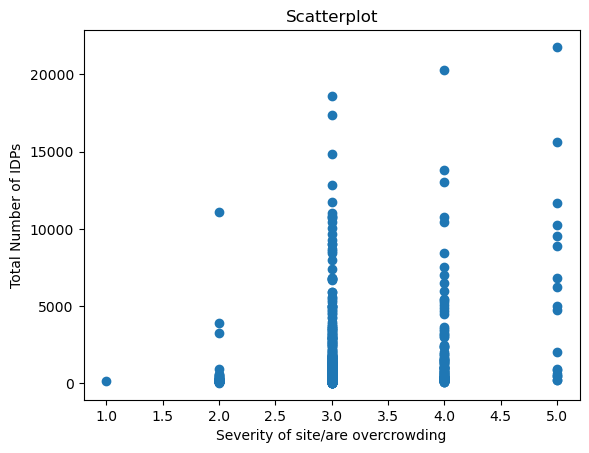

R-squared value: nan


In [9]:
plt.scatter(df['M1594: What is the severity of site/area overcrowding'], df['2.1.b.7: Total Number of IDP Individuals'])
plt.xlabel('Severity of site/are overcrowding')
plt.ylabel('Total Number of IDPs')
plt.title('Scatterplot')
plt.show()
slope, intercept, r_value, p_value, std_err = linregress(df['M1594: What is the severity of site/area overcrowding'], df['2.1.b.7: Total Number of IDP Individuals'])
r_squared = r_value**2

print(f'R-squared value: {r_squared}')

In [10]:
def map_yes_no(value):
    return 1 if value == 'Yes' else 0
specified_columns = ['What are the biggest priority need(s) for IDPs in this site?/Food', 
                     'What are the biggest priority need(s) for IDPs in this site?/NFIs (bedding sets)',
                     'What are the biggest priority need(s) for IDPs in this site?/NFI (Mosquito Nets)', 
                     'What are the biggest priority need(s) for IDPs in this site?/Education', 
                     'What are the biggest priority need(s) for IDPs in this site?/Housing, Land and Properties (HLP) support', 
                     'What are the biggest priority need(s) for IDPs in this site?/Shelter',
                    'What are the biggest priority need(s) for IDPs in this site?/NFI (Kitchen sets)',
                    'What are the biggest priority need(s) for IDPs in this site?/WASH', 
                    'What are the biggest priority need(s) for IDPs in this site?/Livelihoods',
                    'What are the biggest priority need(s) for IDPs in this site?/NFIs (emergency shelter kits)',
                    'What are the biggest priority need(s) for IDPs in this site?/NFIs (hygiene kits)',
                    'What are the biggest priority need(s) for IDPs in this site?/Healthcare',
                    'What are the biggest priority need(s) for IDPs in this site?/Protection services',
                    'What are the biggest priority need(s) for IDPs in this site?/None',
                    'What are the biggest priority need(s) for IDPs in this site?/Other']

binary_columns = df[specified_columns].applymap(map_yes_no)

# Create a new column with the sum of 'yes' and 'no' occurrences across specified columns
df['Total Needs'] = binary_columns.sum(axis=1)
df[specified_columns] = df[specified_columns].replace({'Yes': 1, 'No': 0})
# Display the DataFrame with the new column
print("\nDataFrame with the new column:")
print(df)


DataFrame with the new column:
    1.1.c.1: Site ID           1.1.d.1: Site Name  1.1.f.1: GPS: Longitude  \
1             TG1039               Hareze Seb'ata                 39.58280   
2             TG1040                    Enda Mosa                 39.55493   
3              TG729                   Adi Abagie                 38.18660   
4              TG732                   May Ambssa                 38.23350   
5              TG731                       Hibret                 38.16930   
..               ...                          ...                      ...   
633            TG910   Sewhi Nigus primary school                 39.47700   
634            TG398                       Mesfin                 39.47690   
635            TG447       Adiha Secondary School                 39.45690   
636            TG371                       Sertse                 39.47330   
637            TG448  Lekatit 23 Secondary School                 39.46330   

     1.1.f.2: GPS: Latitude  \


In [11]:
#Key for scaled need values: change scalar values according to whatever specific need an NGO or 
#whatever is deemed to be a more important need than another 
#No need to change string values, only constants
need_values = {'What are the biggest priority need(s) for IDPs in this site?/Food': 10, 
                     'What are the biggest priority need(s) for IDPs in this site?/NFIs (bedding sets)': 8,
                     'What are the biggest priority need(s) for IDPs in this site?/NFI (Mosquito Nets)': 3, 
                     'What are the biggest priority need(s) for IDPs in this site?/Education': 2, 
                     'What are the biggest priority need(s) for IDPs in this site?/Housing, Land and Properties (HLP) support': 5, 
                     'What are the biggest priority need(s) for IDPs in this site?/Shelter': 9,
                    'What are the biggest priority need(s) for IDPs in this site?/NFI (Kitchen sets)': 6,
                    'What are the biggest priority need(s) for IDPs in this site?/WASH': 7, 
                    'What are the biggest priority need(s) for IDPs in this site?/Livelihoods': 1,
                    'What are the biggest priority need(s) for IDPs in this site?/NFIs (emergency shelter kits)': 8,
                    'What are the biggest priority need(s) for IDPs in this site?/NFIs (hygiene kits)': 5,
                    'What are the biggest priority need(s) for IDPs in this site?/Healthcare': 4,
                    'What are the biggest priority need(s) for IDPs in this site?/Protection services': 10,
                    'What are the biggest priority need(s) for IDPs in this site?/None': 0,
                    'What are the biggest priority need(s) for IDPs in this site?/Other': 0}
for column, multiplier in need_values.items():
    df[column] = df[column] * multiplier
df['Scaled Total Needs'] = df[list(need_values.keys())].sum(axis=1)
df

,1.1.c.1: Site ID,1.1.d.1: Site Name,1.1.f.1: GPS: Longitude,1.1.f.2: GPS: Latitude,M1594: What is the severity of site/area overcrowding,S0112: Type of organization providing site management support,What are the biggest priority need(s) for IDPs in this site?,What are the biggest priority need(s) for IDPs in this site?/Food,What are the biggest priority need(s) for IDPs in this site?/NFIs (bedding sets),What are the biggest priority need(s) for IDPs in this site?/NFI (Mosquito Nets),...,3.8.b.4: What are the priority tools and materials required to improve the current shelters for IDPs?,3.8.m.1: What are the main safety concerns with current shelters?,What problems do IDPs face when accessing water?,What problems do IDPs face when in relation to latrine access and use?,"S0095: If IDPs face issues accessing healthcare services, what are these issues?",S1613: Why are some girls not attending school?,S1614: Why are some boys not attending school?,"9.2.j.1: What, if any, resources and assets were lost and/or damaged during displacement by the majority of the IDPs?",Total Needs,Scaled Total Needs
1,TG1039,Hareze Seb'ata,39.58280,14.43946,4.0,None,Livelihoods WASH Shelter,0,0,0,...,CGI Roofing Brick Nails,Lack of security Lack of privacy,Fetching water is a dangerous activity (especi...,Other,No medicine available Distance Insecurity/fear...,Other,Other,Cattle Sheep Goat Crops/seeds Business,3,17
2,TG1040,Enda Mosa,39.55493,14.42384,5.0,None,Livelihoods Shelter Food,10,0,0,...,Machete CGI Roofing Brick,Lack of privacy Lack of security,Waterpoints are too far Fetching water is a da...,Latrines are not functioning,Insecurity/fear No medicine available Cost/mon...,Other,Other,Cattle Sheep Goat Crops/seeds Business,3,20
3,TG729,Adi Abagie,38.18660,14.26590,3.0,Other,Food NFI (Kitchen sets) NFIs (emergency shelte...,10,0,0,...,Rope CGI Roofing Plastic Sheeting,Lack of privacy No light Other,Insufficient number of water points Waterpoint...,Other,Cost/money No medicine available,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business,3,24
4,TG732,May Ambssa,38.23350,14.22740,3.0,Other,Food NFIs (emergency shelter kits) NFI (Kitche...,10,0,0,...,Machete Nails CGI Roofing,Other Lack of privacy No light,Fetching water is a dangerous activity (especi...,Other,Cost/money No medicine available Distance,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business,3,24
5,TG731,Hibret,38.16930,14.32020,3.0,Other,Food NFI (Kitchen sets) Shelter,10,0,0,...,Rope Nails Plastic Sheeting,No light Lack of privacy Other,Not enough water for people Not enough water f...,Lack of latrines,Cost/money No medicine available Lack of ID,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,TG910,Sewhi Nigus primary school,39.47700,13.49960,4.0,International NGO Local NGO,NFIs (bedding sets) Food Shelter,10,8,0,...,CGI Roofing Poles/sticks Grass (roof thatch),Lack of privacy No light,Insufficient number of water points Not enough...,Latrines are unclean/unhygienic Latrines are n...,Cost/money No medicine available,Other,Other,Cattle Sheep Crops/seeds Goat Business Camels,3,27
634,TG398,Mesfin,39.47690,13.49870,3.0,None,Food NFIs (bedding sets) Shelter,10,8,0,...,Poles/sticks CGI Roofing Nails,Lack of privacy,Not enough water for people,Latrines are unclean/unhygienic No male/female...,Cost/money No medicine available,Other,Other,Cattle Sheep Crops/seeds Business Goat Camels,3,27
635,TG447,Adiha Secondary School,39.45690,13.52440,4.0,UN Agency,NFIs (hygiene kits) Food Livelihoods,10,0,0,...,Machete Nails CGI Roofing,Lack of privacy No light,Not enough containers to store the water,Lack of latrines Latrines are unclean/unhygienic,No medicine available Cost/money,Other,Other,Cattle Sheep Goat Crops/seeds Camels Business,3,16
636,TG371,Sertse,39.47330,13.50460,4.0,None,NFI (Kitchen sets) Livelihoods Food,10,0,0,...,CGI Roofing Grass (roof thatch) Brick,Lack of privacy,

In [12]:
df['Scaled Population Needs'] = df['Scaled Total Needs'] * df['2.1.b.7: Total Number of IDP Individuals']
df['Total Children 4 or Under'] = df['2.1.h.1: Number of Male (0-4 years)'] + df['2.1.h.2: Number of Female (0-4 years)']
df['Proportion of Children'] = df['Total Children 4 or Under'] / df['2.1.b.7: Total Number of IDP Individuals']
df['Proportion of Children'] = df['Proportion of Children'].round(3)

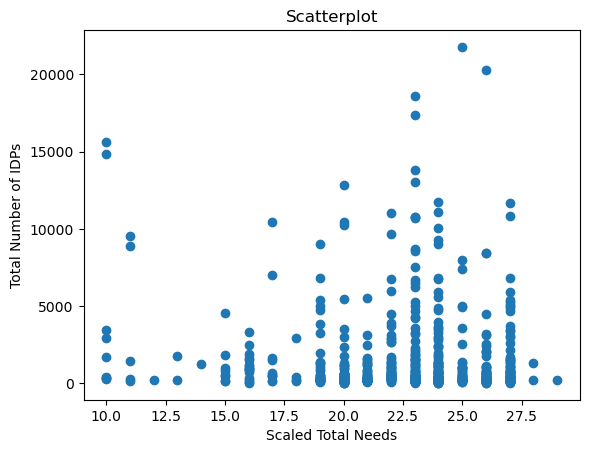

R-squared value: 0.002171621412201952


In [13]:
#Creates scatter plot with Needs vs. Population to see if there is any significant relationship
plt.scatter(df['Scaled Total Needs'], df['2.1.b.7: Total Number of IDP Individuals'])
plt.xlabel('Scaled Total Needs')
plt.ylabel('Total Number of IDPs')
plt.title('Scatterplot')
plt.show()
slope, intercept, r_value, p_value, std_err = linregress(df['Scaled Total Needs'], df['2.1.b.7: Total Number of IDP Individuals'])
r_squared = r_value**2

print(f'R-squared value: {r_squared}')

In [14]:
#Change the two strings of column names based on whatever need an NGO can provided for the community, can copy and add more needs as needed
condition_need1 = (df['What are the biggest priority need(s) for IDPs in this site?/Food'] > 0)

condition_need2 = (df['What are the biggest priority need(s) for IDPs in this site?/Shelter'] >0)
#population_limit = 1000
#population_limit_condition = (df['2.1.b.7: Total Number of IDP Individuals'] >population_limit )
#if additional needs, add another & statement e.g. df[need1 & need2 & need3]
#If NGO has limited resources, can add population limit condition to filter statement e.g. df[need1 & need2 & population_limit_condition]
filtered_df = df[condition_need1 & condition_need2]

#Filtering statement for if a given NGO has a desire to help groups with more or less needs. If less then use < value, if greater than use > value
threshold_value = 25
filtered_df = filtered_df[filtered_df['Scaled Total Needs'] < threshold_value]
filtered_df


,1.1.c.1: Site ID,1.1.d.1: Site Name,1.1.f.1: GPS: Longitude,1.1.f.2: GPS: Latitude,M1594: What is the severity of site/area overcrowding,S0112: Type of organization providing site management support,What are the biggest priority need(s) for IDPs in this site?,What are the biggest priority need(s) for IDPs in this site?/Food,What are the biggest priority need(s) for IDPs in this site?/NFIs (bedding sets),What are the biggest priority need(s) for IDPs in this site?/NFI (Mosquito Nets),...,What problems do IDPs face when in relation to latrine access and use?,"S0095: If IDPs face issues accessing healthcare services, what are these issues?",S1613: Why are some girls not attending school?,S1614: Why are some boys not attending school?,"9.2.j.1: What, if any, resources and assets were lost and/or damaged during displacement by the majority of the IDPs?",Total Needs,Scaled Total Needs,Scaled Population Needs,Total Children 4 or Under,Proportion of Children
2,TG1040,Enda Mosa,39.554930,14.423840,5.0,None,Livelihoods Shelter Food,10,0,0,...,Latrines are not functioning,Insecurity/fear No medicine available Cost/mon...,Other,Other,Cattle Sheep Goat Crops/seeds Business,3,20,204600.0,850.0,0.083
6,TG1042,Tsaeda Ambora,38.128251,14.238904,3.0,Other,Food Shelter Healthcare,10,0,0,...,Other,Cost/money No medicine available,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business,3,23,8924.0,64.0,0.165
8,TG735,Dedebit,37.983600,14.455200,3.0,Other,Food Shelter NFIs (hygiene kits),10,0,0,...,No male/female specific latrines Latrines are ...,No medicine available Distance Cost/money,Other,Other,Sheep Cattle Camels Goat Crops/seeds Business,3,24,12336.0,84.0,0.163
10,TG428,Kaleb Secondary School,38.713800,14.118700,3.0,UN Agency,Food Shelter Healthcare,10,0,0,...,Lack of latrines No male/female specific latri...,No medicine available Cost/money,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business,3,23,12627.0,100.0,0.182
15,TG430,Kedamawi Menelik Secondary school,38.723000,14.120600,4.0,UN Agency,Food Shelter Healthcare,10,0,0,...,No male/female specific latrines Latrines are ...,No medicine available Cost/money,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business,3,23,11615.0,106.0,0.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,TG385,Momona,39.451500,13.506100,4.0,Other Local NGO,Food Healthcare Shelter,10,0,0,...,Lack of latrines No male/female specific latri...,Cost/money No medicine available,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business ...,3,23,248285.0,572.0,0.053
610,TG493,Nebar Ketema,39.549100,13.485700,4.0,Local NGO,Food Shelter NFIs (hygiene kits),10,0,0,...,Latrines are not functioning Latrines are not ...,No medicine available Cost/money,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business ...,3,24,117408.0,880.0,0.180
629,TG396,Lekatit,39.481800,13.509800,3.0,Other,Food Shelter Livelihoods,10,0,0,...,Lack of latrines Latrines are unclean/unhygien...,No medicine available,Other,Other,Cattle Sheep Goat Crops/seeds Business,3,20,11280.0,124.0,0.220
630,TG370,Ginbot 20,39.472900,13.512200,3.0,None,Food Shelter Livelihoods,10,0,0,...,Latrines are unclean/unhygienic,Cost/money Discrimination No medicine available,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business ...,3,20,209240.0,1883.0,0.180


In [15]:
#Filters dataset to show which has the highest proportion of Children 
df_sorted = df.sort_values(by='Proportion of Children', ascending=False)
df_sorted

,1.1.c.1: Site ID,1.1.d.1: Site Name,1.1.f.1: GPS: Longitude,1.1.f.2: GPS: Latitude,M1594: What is the severity of site/area overcrowding,S0112: Type of organization providing site management support,What are the biggest priority need(s) for IDPs in this site?,What are the biggest priority need(s) for IDPs in this site?/Food,What are the biggest priority need(s) for IDPs in this site?/NFIs (bedding sets),What are the biggest priority need(s) for IDPs in this site?/NFI (Mosquito Nets),...,What problems do IDPs face when in relation to latrine access and use?,"S0095: If IDPs face issues accessing healthcare services, what are these issues?",S1613: Why are some girls not attending school?,S1614: Why are some boys not attending school?,"9.2.j.1: What, if any, resources and assets were lost and/or damaged during displacement by the majority of the IDPs?",Total Needs,Scaled Total Needs,Scaled Population Needs,Total Children 4 or Under,Proportion of Children
13,TG419,Abreha We'atsbha Elementary School,38.723600,14.124500,3.0,UN Agency,Healthcare Food NFIs (emergency shelter kits),10,0,0,...,Latrines are unclean/unhygienic,No medicine available,Lack of School Feeding Poor educational standard,Lack of School Feeding Poor educational standa...,Cattle Crops/seeds Business,3,22,9680.0,134.0,0.305
575,TG584,Hibret,38.285100,14.101300,5.0,None,Food Shelter NFI (Kitchen sets),10,0,0,...,Latrines are unclean/unhygienic Latrines are d...,Cost/money No medicine available,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business,3,25,544100.0,6529.0,0.300
166,TG550,Adi Nebried Elementary School,38.189000,14.413200,3.0,Other,Food NFIs (bedding sets) NFI (Mosquito Nets),10,8,3,...,Lack of latrines No male/female specific latri...,No medicine available Health service are only ...,Other,Other,Cattle Sheep Goat Business Crops/seeds Camels,3,21,6279.0,83.0,0.278
584,TG383,Selam,39.464600,13.497000,3.0,None,Food NFI (Kitchen sets) Protection services,10,0,0,...,No male/female specific latrines Latrines are ...,Cost/money Distance,Other,Other,Crops/seeds Business,3,26,54860.0,585.0,0.277
237,TG927,Ketena 4,38.751700,14.118800,3.0,None,Food NFI (Kitchen sets) NFIs (hygiene kits),10,0,0,...,No issues with latrines,No medicine available Distance Health service ...,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business,3,21,27594.0,359.0,0.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,TG883,Abeba Yohannes,38.768700,13.987200,3.0,None,Food NFI (Kitchen sets) NFIs (emergency shelte...,10,0,0,...,Other,Cost/money No medicine available,They are attending,They are attending,Sheep Camels Cattle Goat Crops/seeds Business,3,24,26904.0,11.0,0.010
115,TG525,Adi Gdad,38.344400,14.076000,3.0,Other,Food NFIs (emergency shelter kits) NFIs (beddi...,10,8,0,...,Latrines are unclean/unhygienic Latrines are n...,Cost/money No medicine available Distance,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business,3,26,4004.0,1.0,0.006
76,TG1055,Megabit 20 Elementary School,37.774128,14.400419,3.0,International NGO Local NGO,Food NFIs (bedding sets) Healthcare,10,8,0,...,Latrines are unclean/unhygienic Latrines are d...,No medicine available Cost/money,Other,Other,Cattle Sheep Goat Crops/seeds Business Camels,3,22,28358.0,6.0,0.005
102,TG1062,Endabaguna Reception Center,38.183373,13.942160,5.0,International NGO UN Agency,Food NFIs (bedding sets) NFIs (emergency shelt...,10,8,0,...,Lack of latrines Latrines are unclean/unhygien...,Cost/money No medicine available,Other,Other,Cattle Sheep Camels Goat Crops/seeds Business,3,26,53508.0,6.0,0.003


In [16]:
data = filtered_df.dropna(subset=['1.1.f.2: GPS: Latitude', '1.1.f.1: GPS: Longitude'])

map_center = [data['1.1.f.2: GPS: Latitude'].iloc[0], data['1.1.f.1: GPS: Longitude'].iloc[0]]
mymap = folium.Map(location=map_center, zoom_start=10)

for index, row in data.iterrows():
    marker = row['1.1.d.1: Site Name'] + ' ' + str(row['2.1.b.7: Total Number of IDP Individuals'])
    folium.Marker(
        location=[row['1.1.f.2: GPS: Latitude'], row['1.1.f.1: GPS: Longitude']],
        popup=row['1.1.d.1: Site Name']+ ' ' + str(row['Proportion of Children']),
        tooltip=marker  
    ).add_to(mymap)

# Save the map to an HTML file or display it
mymap.save('map_with_names.html')
mymap
#When hovering over marker, shows camp name and population. Clicking shows camp name and proportion of children

In [17]:

#df_sorted_desc = df.sort_values(by='M1594: What is the severity of site/area overcrowding', ascending=False)
#threshold_age = 4.0


#df_filtered = df_sorted_desc[df_sorted_desc['M1594: What is the severity of site/area overcrowding'] > threshold_age]

#df_filtered

In [18]:
#columns_to_keep = [2,3]  # Keep columns with indices 0 and 2 (A and C)

# Use iloc to select the desired columns
#df_close = df_filtered.iloc[:, columns_to_keep]

#df_close
#data_point = {'1.1.f.1: GPS: Longitude': 39.27511, '1.1.f.2: GPS: Latitude': 14.09233 }

# Calculate absolute differences for each column


#absolute_diff = (df_close - data_point).abs()

# Find the index of the row with the overall minimum sum of absolute differences
#closest_index = absolute_diff.sum(axis=1).idxmin()

# Get the closest values for each column
#closest_values = df_close.loc[closest_index]

#print(f"Closest values to {data_point}:")
#print(closest_values)